# **Predict the onset of diabetes based on diagnostic data**

In [67]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

In [69]:
# Data Sourcing
data = pd.read_csv("diabetes.csv")

In [70]:
print(data[~data.applymap(np.isreal).all(1)])
null_columns= data.columns[data.isnull().any()]

print(data[data.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: []
Index: []


In [71]:
# first 5 rows of a dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
# Summary of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
# Finding number of rows and columns in dataset
data.shape

(768, 9)

In [74]:
# Dropping Duplicates from dataset
data.drop_duplicates(inplace = True)
data.shape

(768, 9)

In [75]:
# Finding null values in dataset
round((data.isnull().sum())/len(data)*100, 2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

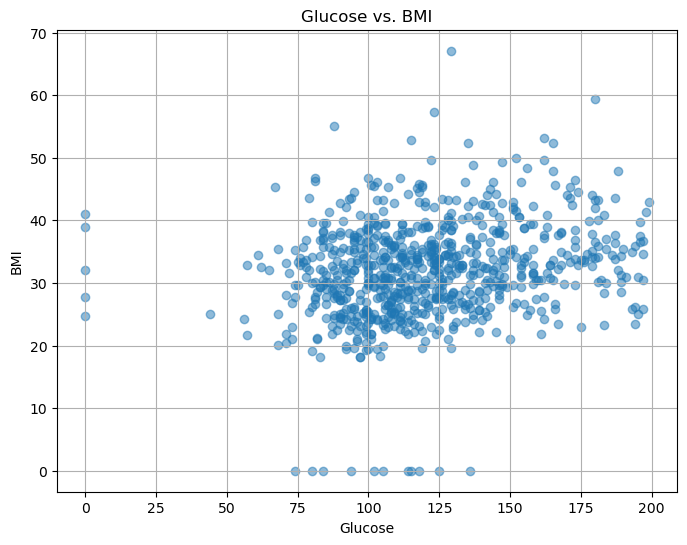

In [76]:
# Scatter plot of 'Glucose' vs. 'BMI'
plt.figure(figsize= [8, 6])
plt.scatter(x = data['Glucose'], y = data['BMI'], alpha=0.5)
plt.title('Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

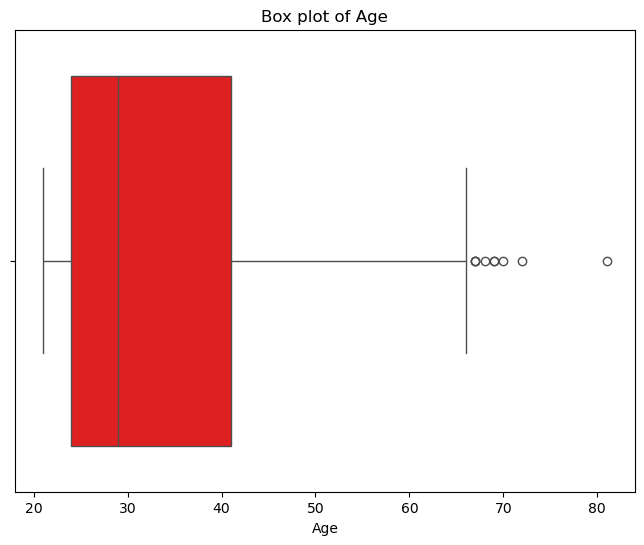

In [77]:
# Box plot of 'Age'
plt.figure(figsize=[8, 6])
sns.boxplot(x = data['Age'], color = 'red')
plt.title('Box plot of Age')
plt.show()

In [78]:
# value counts of outcome
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

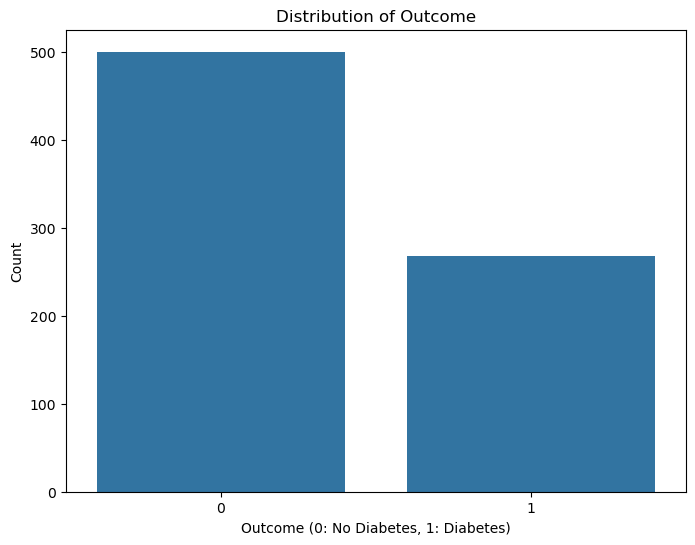

In [79]:
# Bar plot of the 'Outcome' variable (0 or 1)
plt.figure(figsize=[8, 6])
sns.countplot(x=data['Outcome'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

<Figure size 500x500 with 0 Axes>

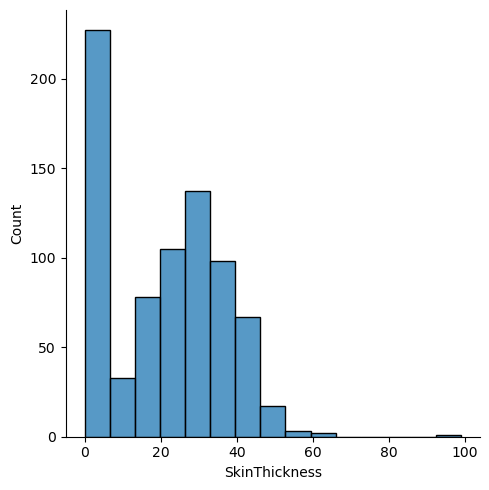

In [80]:
plt.figure(figsize = [5,5])
sns.displot(data['SkinThickness'])
plt.show()

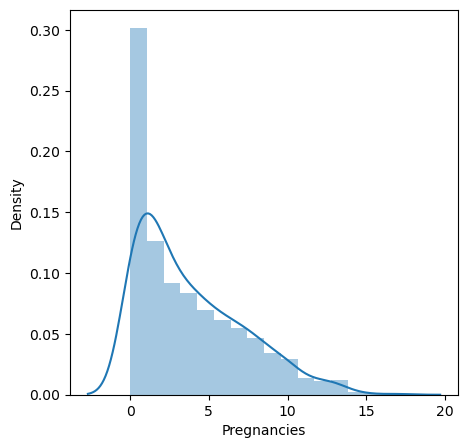

In [81]:
plt.figure(figsize = [5,5])
sns.distplot(data['Pregnancies'])
plt.show()

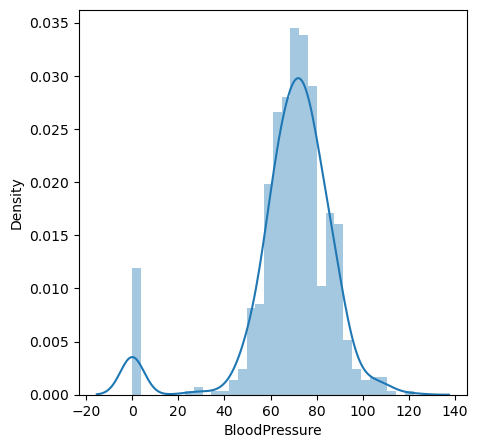

In [82]:
plt.figure(figsize = [5,5])
sns.distplot(data['BloodPressure'])
plt.show()

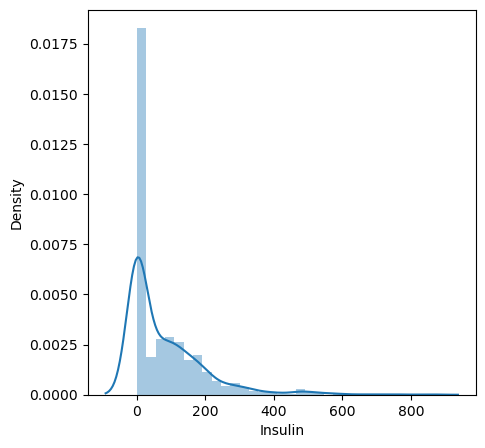

In [83]:
plt.figure(figsize = [5,5])
sns.distplot(data['Insulin'])
plt.show()

<Figure size 500x500 with 0 Axes>

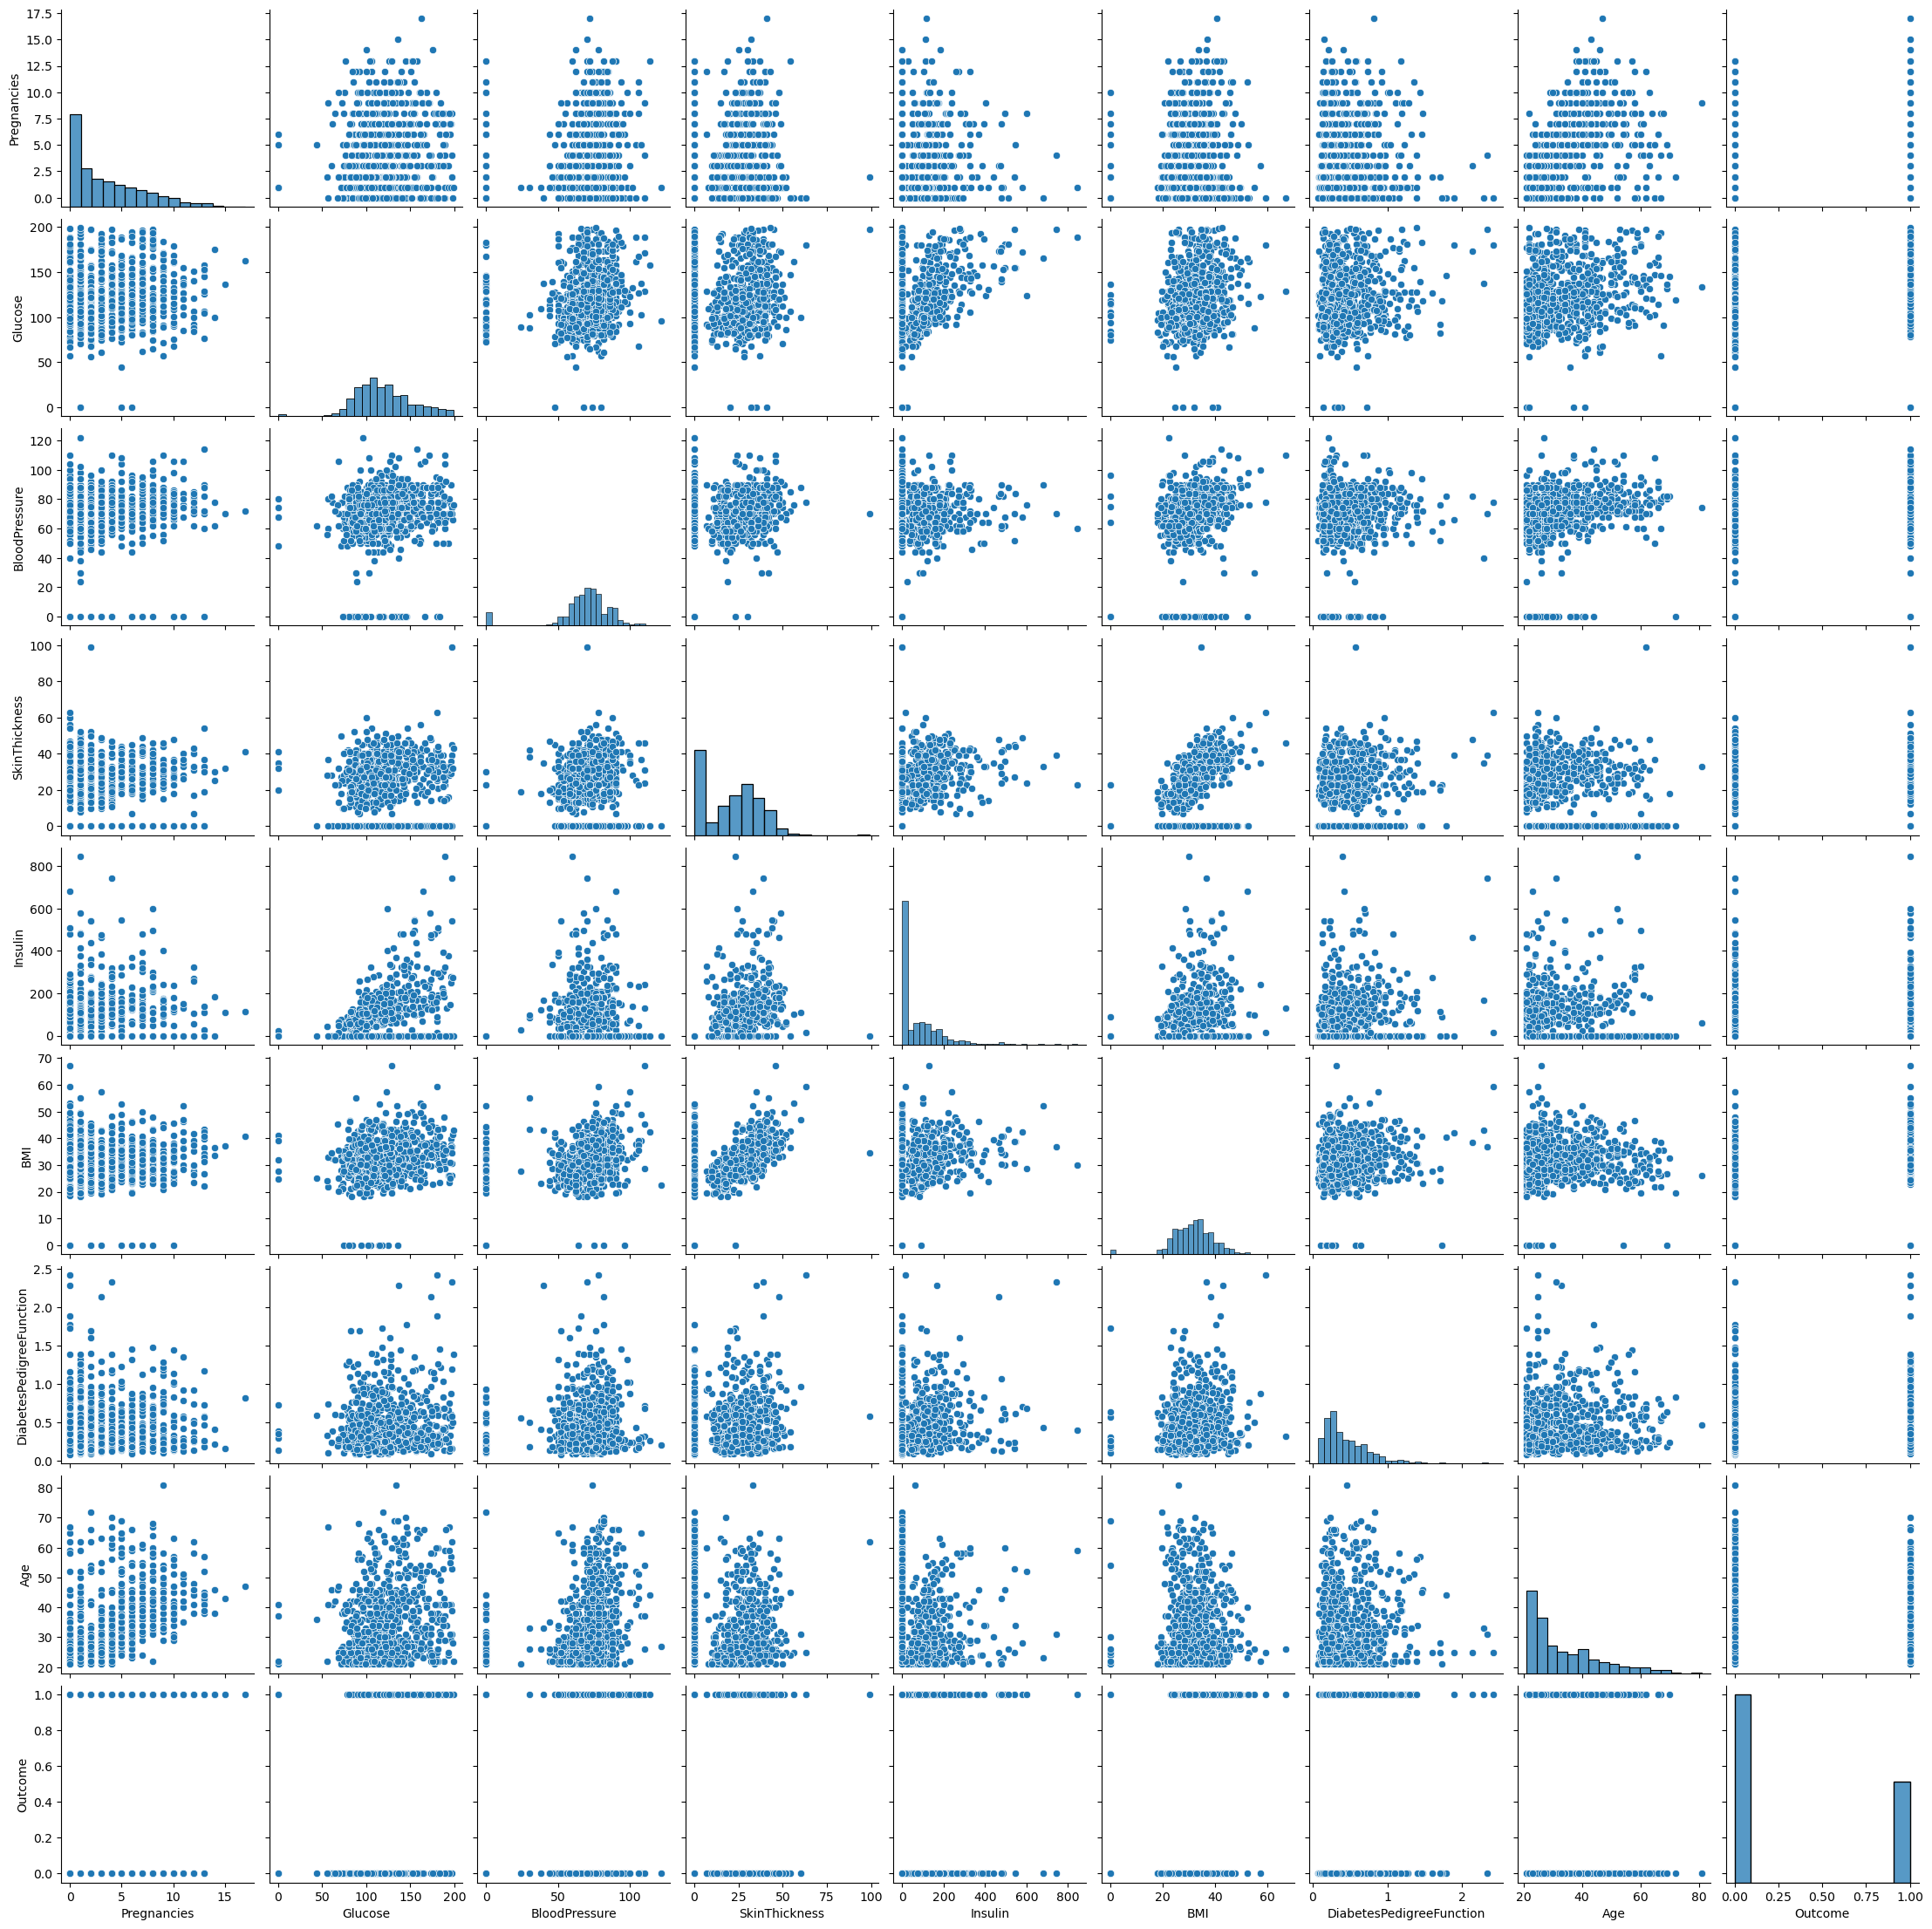

In [84]:
# pairplot of diagnostic dataset
plt.figure(figsize = [5,5])
sns.pairplot(data)
plt.show()

In [85]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


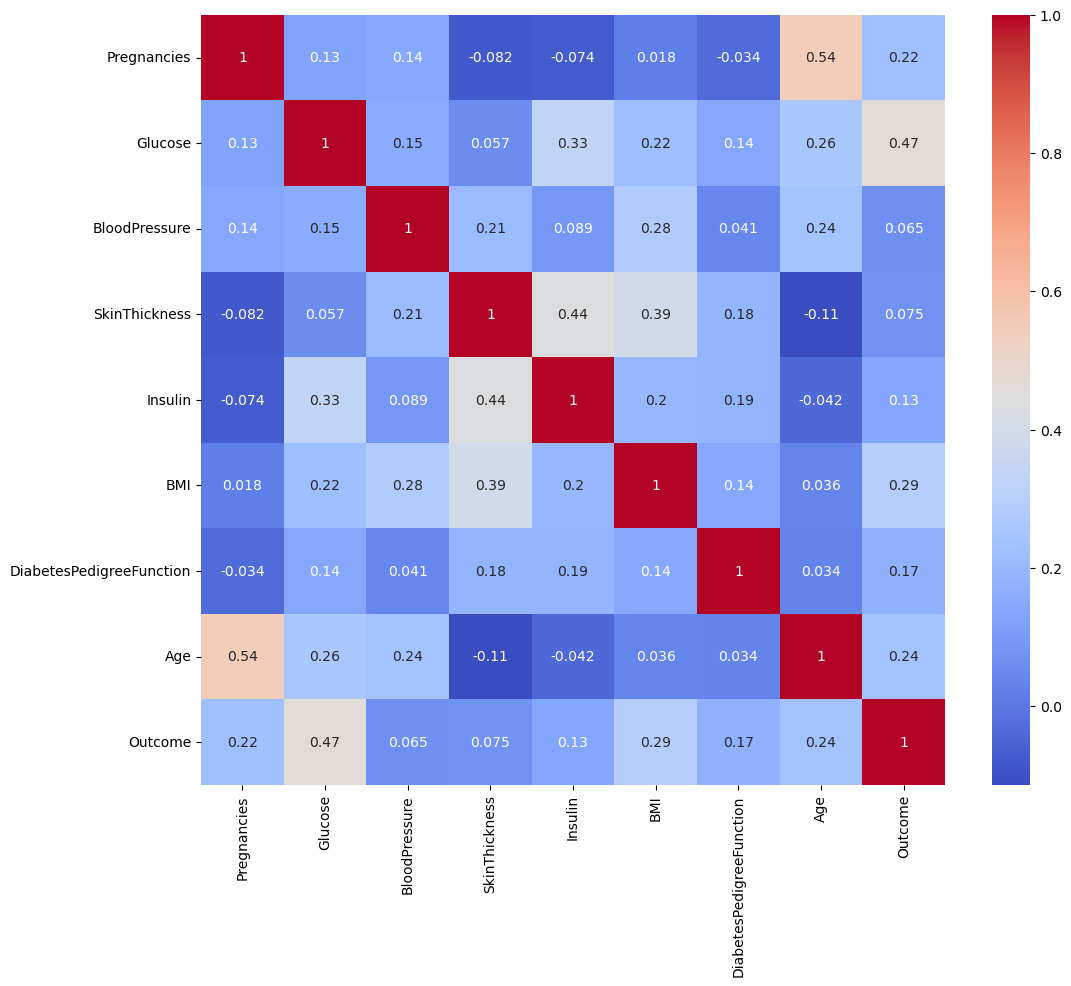

In [86]:
# Heatmap
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True, cmap= 'coolwarm')
plt.show()

<Figure size 600x600 with 0 Axes>

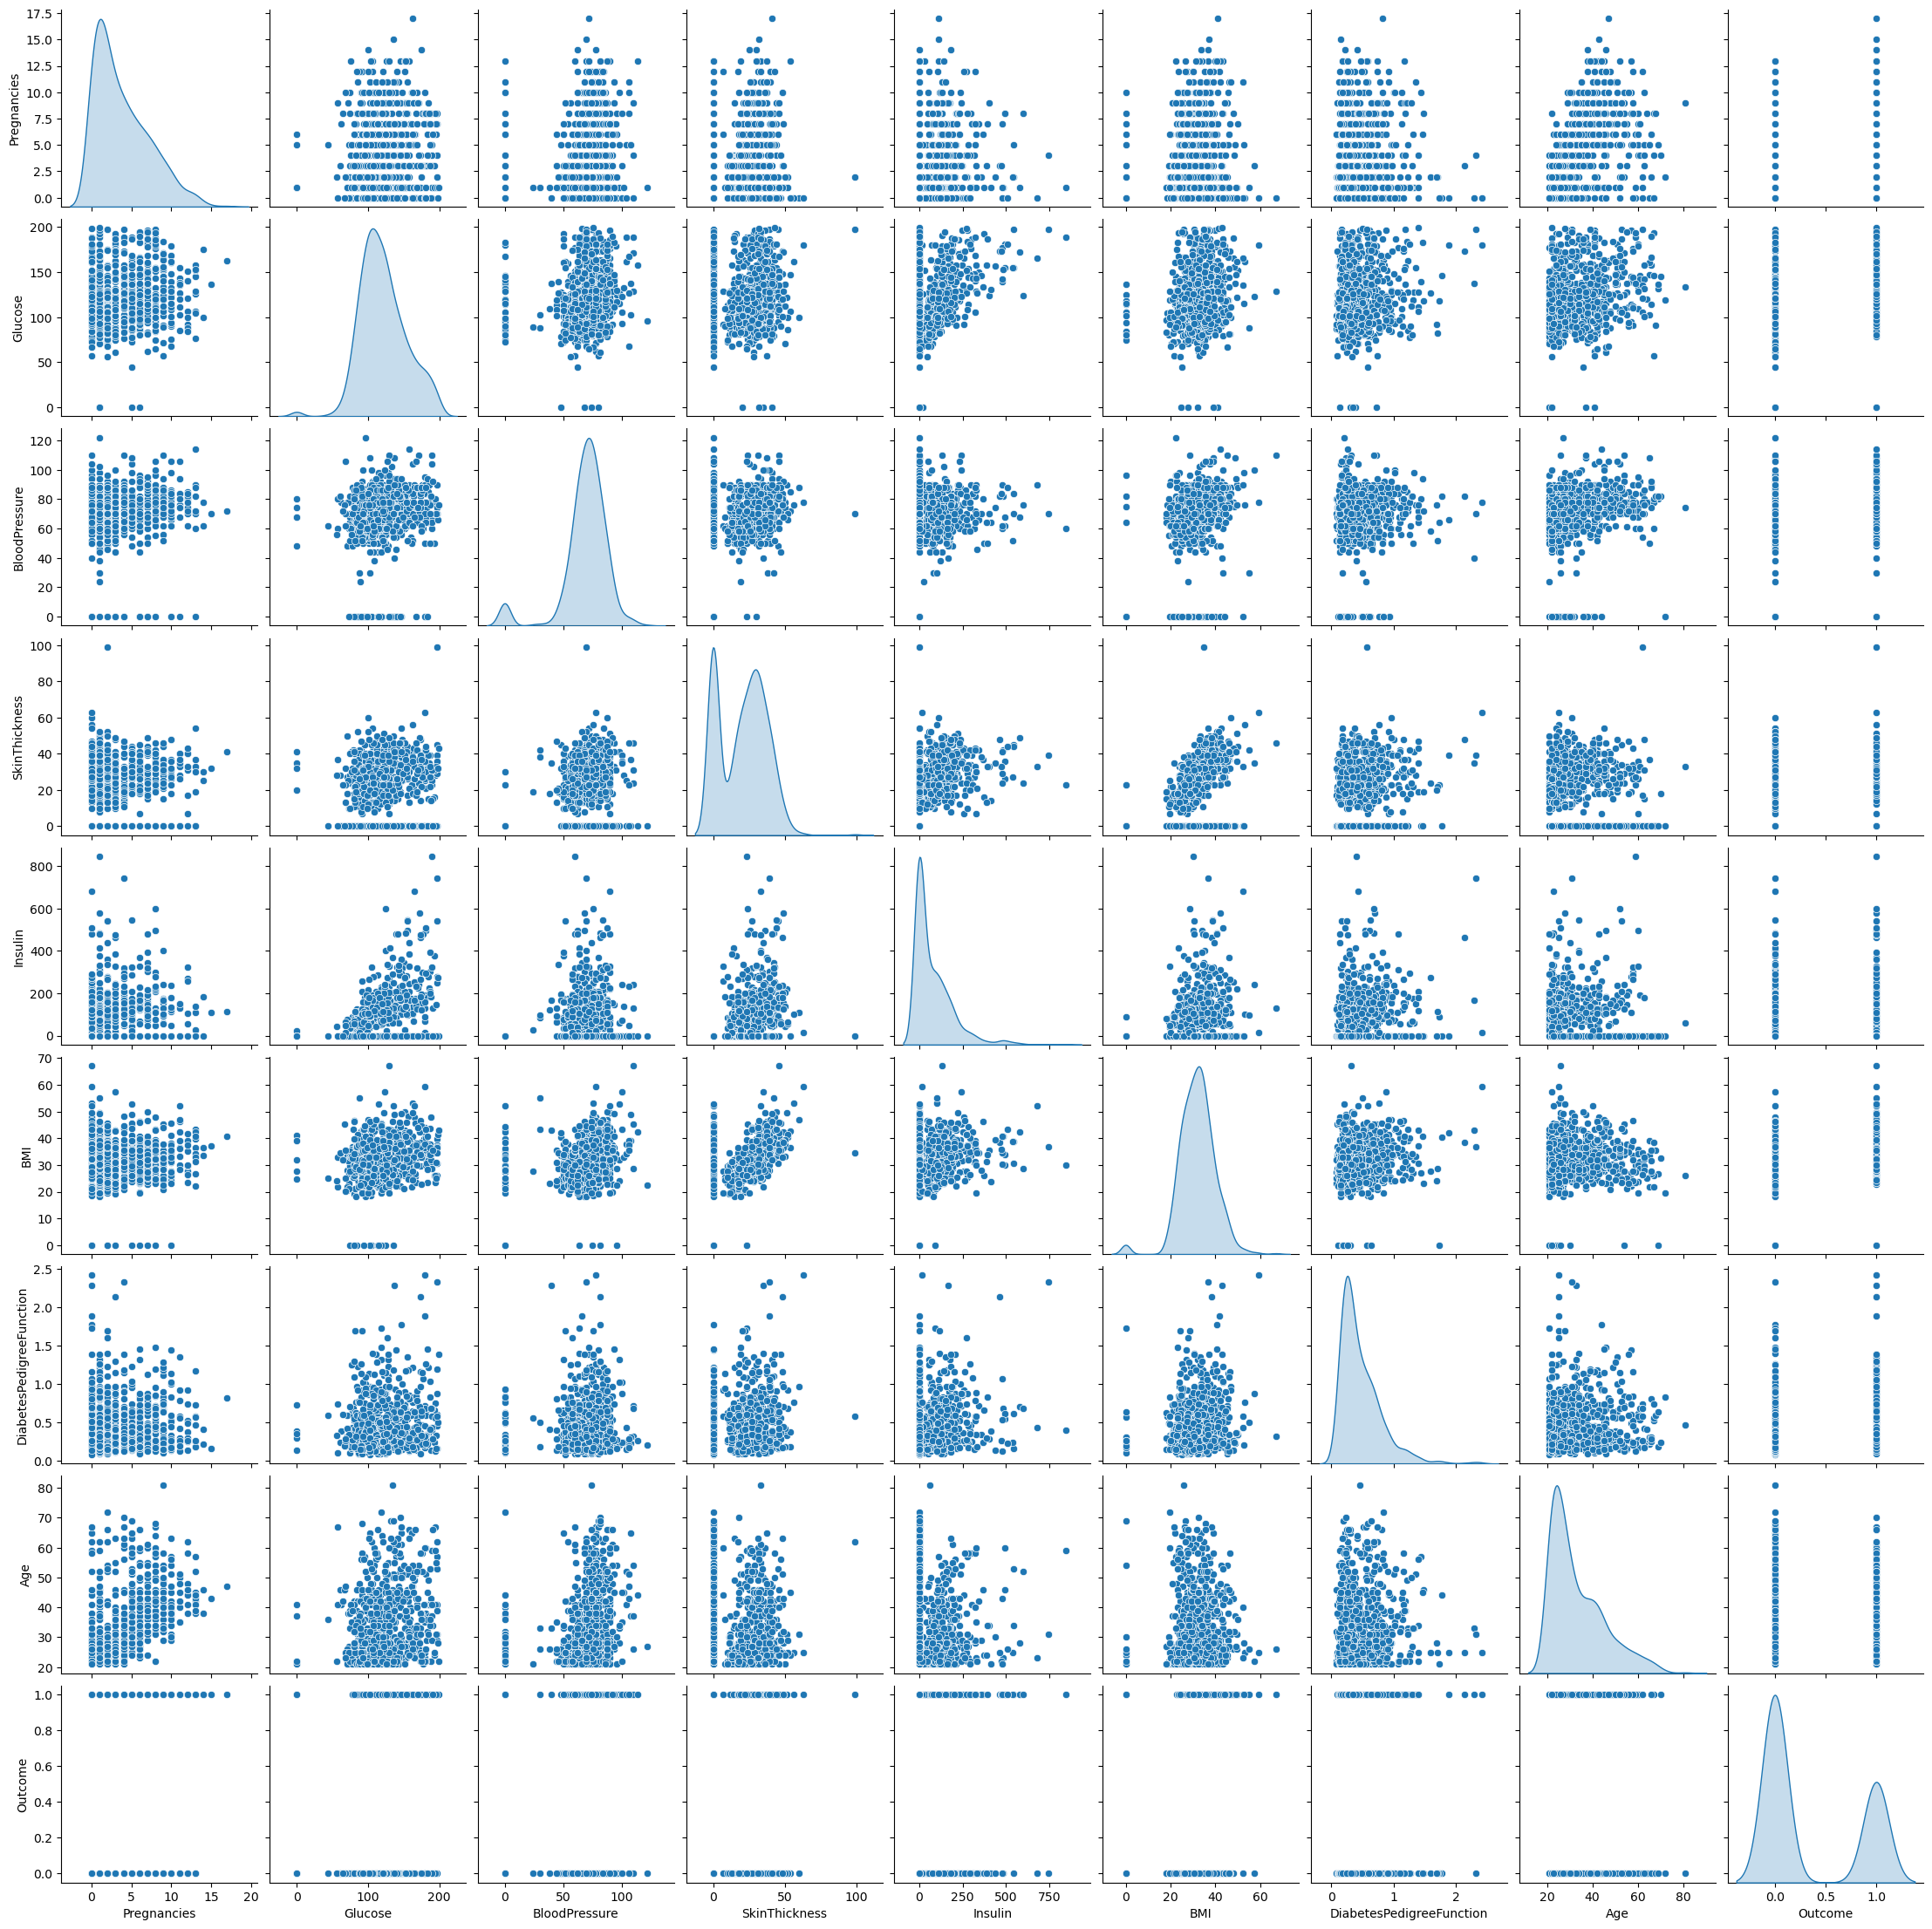

In [87]:
plt.figure(figsize= [6,6])
sns.pairplot(data, diag_kind ='kde')
plt.show()

In [88]:
print("PIMA test:", data.groupby(['Outcome']).count())

PIMA test:          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268  


In [89]:
Data = data.copy()
data = data[data.loc[:"BMI"] > 0]
data.fillna(0, inplace = True)

In [90]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
# Split our dataset into training and test data
from sklearn.model_selection import train_test_split

In [93]:
# To calculate accuracy measures and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [94]:
# X = data.iloc[:,0:8]

In [95]:
# y = data.iloc[:,8]
# seed
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data[data.columns[-1]], test_size=0.2, random_state=42)

In [96]:
# shape of train test data
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [97]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21
618,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65
231,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46


In [98]:
y_train.head()

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
Name: Outcome, dtype: float64

### **Logistic Regression**

In [100]:
model = LogisticRegression()

In [101]:
model.fit(X_train, y_train)

LogisticRegression()

In [102]:
y_predict = model.predict(X_test)

In [103]:
print("Y predict/hat:", y_predict)

Y predict/hat: [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [104]:
# To label all coefficient
column_label = list(X_train.columns)

In [105]:
model_Coeff = pd.DataFrame(model.coef_, columns = column_label)

In [106]:
model_Coeff['intercept'] = model.intercept_

In [107]:
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.066486  0.033983      -0.013875       0.004189 -0.001842  0.101627   

   DiabetesPedigreeFunction       Age  intercept  
0                  0.622183  0.034942  -8.906564  


In [108]:
logmodel_score = model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.7467532467532467


In [109]:
accuracy={}
accuracy['LogisticRegression']=logmodel_score
accuracy

{'LogisticRegression': 0.7467532467532467}

In [110]:
conf_matrix = confusion_matrix(y_test, y_predict)

In [111]:
print(conf_matrix)

[[78 21]
 [18 37]]


### **K - Nearest Neighbour (KNN)**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data[data.columns[-1]], test_size=0.2, random_state=42)

In [114]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21
618,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65
231,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46


In [115]:
y_train.head()

60     0.0
618    1.0
346    0.0
294    0.0
231    1.0
Name: Outcome, dtype: float64

In [116]:
from sklearn.preprocessing import MinMaxScaler
# Create a new instance of MinMaxScaler
scaler = MinMaxScaler()

In [117]:
scaler.fit(X_train)

MinMaxScaler()

In [118]:
X_train_scaled=scaler.fit_transform(X=X_train)
X_test_scaled=scaler.transform(X=X_test)

In [119]:
X_train_scaled.dtype

dtype('float64')

In [120]:
X_train_scaled

array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [121]:
X_train_scaled1 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [122]:
X_train_scaled1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


In [123]:
X_train_scaled.shape

(614, 8)

In [124]:
y_train.shape

(614,)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
Knn_model = KNeighborsClassifier(n_neighbors = 10)

In [127]:
Knn_model.fit(X_train_scaled1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [128]:
predictions = Knn_model.predict(X_train_scaled1)

In [129]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       401
         1.0       0.77      0.54      0.63       213

    accuracy                           0.78       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



In [130]:
print(confusion_matrix(y_train, predictions))

[[367  34]
 [ 99 114]]


In [131]:
from sklearn.metrics import f1_score

In [132]:
f1_score(y_train, predictions)

0.631578947368421

In [133]:
f1_score(y_test, Knn_model.predict(X_test_scaled))

0.5376344086021505

## **Decision Tree**

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [136]:
dt = DecisionTreeClassifier(max_depth = 3)
dt = dt.fit(X_train, y_train)

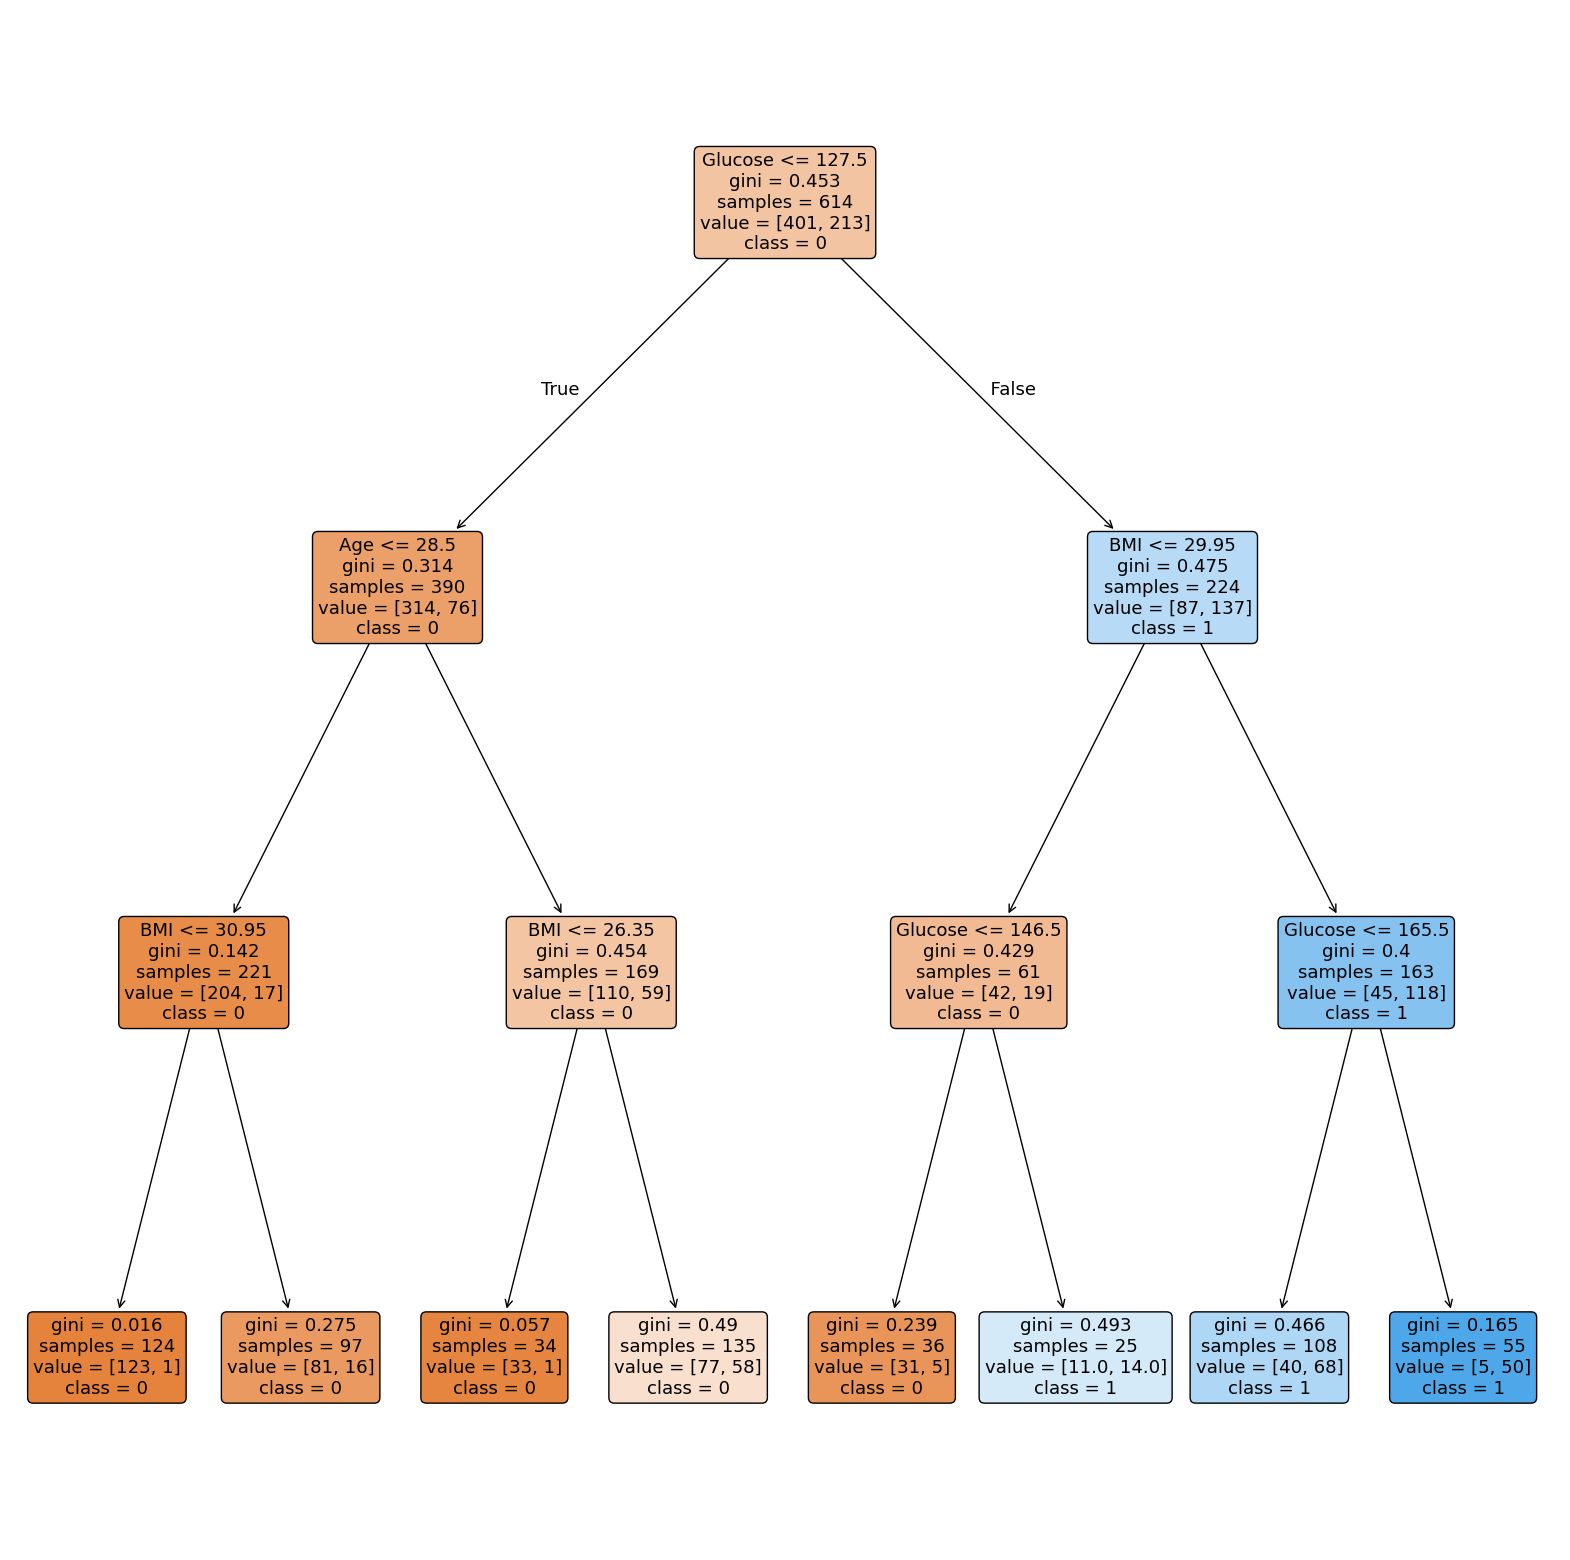

In [137]:
plt.figure(figsize = [20,20])
plot_tree(dt, class_names = ['0','1'],
          feature_names = X_train.columns, filled = True, rounded = True )
plt.show()

Evaluating Model Performance

In [139]:
dt_pred = dt.predict(X_test)

In [140]:
dt_acu= accuracy_score(y_test,dt_pred)
dt_acu

0.7597402597402597

In [141]:
accuracy['DecisionTree']=dt_acu
accuracy

{'LogisticRegression': 0.7467532467532467, 'DecisionTree': 0.7597402597402597}

In [142]:
print(confusion_matrix(y_test, dt_pred))

[[83 16]
 [21 34]]


### **Random Forest**

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=30)

In [145]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [146]:
rf_pred=rf_model.predict(X_test)

In [147]:
rf_acu= accuracy_score(y_test,rf_pred)
rf_acu

0.7272727272727273

In [148]:
accuracy['RandomForest']=rf_acu
accuracy

{'LogisticRegression': 0.7467532467532467,
 'DecisionTree': 0.7597402597402597,
 'RandomForest': 0.7272727272727273}

### **Fine Tuning**

In [150]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [151]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [152]:
data = data[['Pregnancies', 'Glucose', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction','Age', 'Outcome']]

In [153]:
# recreating testing and training stes
X_train,X_test,y_train,y_test=train_test_split(data[data.columns[:-1]],data[data.columns[-1]],test_size=0.25) # this time i take .25 as testsize

In [154]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X=X_train)
X_test_scaled=scaler.transform(X=X_test)

In [155]:
X_train_scaled1=pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [156]:
X_train_scaled1.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.357143,0.542714,0.088652,0.607744,0.076627,0.200000
1,0.785714,0.678392,0.000000,0.880471,0.211473,0.316667
2,0.142857,0.613065,0.186761,0.609428,0.313356,0.116667
3,0.500000,0.713568,0.224586,0.484848,0.258134,0.666667
4,0.285714,0.572864,0.000000,0.368687,0.148973,0.266667


## **Knn**

In [158]:
knn_model=KNeighborsClassifier(n_neighbors=10) # using knn again on the updated dataset
knn_model.fit(X_train_scaled1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [159]:
predictions=knn_model.predict(X_train_scaled1)

In [160]:
print(classification_report(y_true=y_train,y_pred=predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       380
         1.0       0.82      0.54      0.65       196

    accuracy                           0.80       576
   macro avg       0.81      0.74      0.76       576
weighted avg       0.80      0.80      0.79       576



In [161]:
print(confusion_matrix(y_true=y_train, y_pred=predictions))

[[357  23]
 [ 91 105]]


In [162]:
# Assuming the user intended to use the predictions on the test set.
predictions = knn_model.predict(X_test_scaled)
f1_score(y_true=y_test, y_pred=predictions)

0.5045045045045045

## **Logistic Rrgression**

In [164]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [165]:
y_predict = Logistic_model.predict(X_test)
print("Y predict/hat ", y_predict)

Y predict/hat  [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]


In [166]:
# To label all the coefficient
column_label = list(X_train.columns)
model_Coeff = pd.DataFrame(Logistic_model.coef_, columns = column_label)
model_Coeff['intercept'] = Logistic_model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     Pregnancies   Glucose  Insulin       BMI  DiabetesPedigreeFunction  \
0      0.05589  0.034455 -0.00161  0.087684                  1.156662   

        Age  intercept  
0  0.021778  -9.246441  


In [167]:
logmodel_score = Logistic_model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.7760416666666666


In [168]:
new_accuracy={}
new_accuracy['LogisticRegression']=logmodel_score
new_accuracy

{'LogisticRegression': 0.7760416666666666}

### **Decision Tree**

In [170]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [171]:
dt_pred=dt.predict(X_test)

In [172]:
dt_acu= accuracy_score(y_test,dt_pred)
dt_acu

0.7135416666666666

In [173]:
new_accuracy['DecisionTree']=dt_acu
new_accuracy

{'LogisticRegression': 0.7760416666666666, 'DecisionTree': 0.7135416666666666}

### **Random Forest**

In [175]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [176]:
rf_pred=rf_model.predict(X_test)

In [177]:
rf_acu= accuracy_score(y_test,rf_pred)
rf_acu

0.75

In [178]:
new_accuracy['RandomForest'] = rf_acu
new_accuracy

{'LogisticRegression': 0.7760416666666666,
 'DecisionTree': 0.7135416666666666,
 'RandomForest': 0.75}

## **Result**

In [180]:
accuracy

{'LogisticRegression': 0.7467532467532467,
 'DecisionTree': 0.7597402597402597,
 'RandomForest': 0.7272727272727273}

In [181]:
new_accuracy

{'LogisticRegression': 0.7760416666666666,
 'DecisionTree': 0.7135416666666666,
 'RandomForest': 0.75}

### **By comparing the models we find that Logistic Regression Model has a better accuracy than any other model**

---

